In [ ]:
sentences=["Sentiment analysis is the process of classifying the emotional intent of text.",
        "Toxicity classification is a branch of sentiment analysis where the aim is not just to classify hostile intent but also to classify particular categories such as threats, insults, obscenities, and hatred towards certain identities.",
        "Deep learning is a subset of machine learning that focuses on neural networks.",
        "Named entity recognition aims to extract entities in a piece of text into predefined categories such as personal names, organizations, locations, and quantities.",
        "Topic modeling is an unsupervised text mining task that takes a corpus of documents and discovers abstract topics within that corpus."]

TEXT PREPROCESSING

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = text.split()  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words] #stopwords removal
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sentence = [preprocess(sentence) for sentence in sentences]

In [ ]:
print(sentence[:2])

['sentiment analysis process classifying emotional intent text', 'toxicity classification branch sentiment analysis aim classify hostile intent also classify particular categories threats insults obscenities hatred towards certain identities']


SIMILARITY MEASURES

In [ ]:
#cosine similarity
from math import sqrt, pow, exp
import numpy as np

def cos_similarity(x,y):
  similarity_matrix = np.dot(x, y.T)
  # Magnitudes of vectors in x and y
  x_magnitudes = np.sqrt(np.sum(x ** 2, axis=1, keepdims=True))
  y_magnitudes = np.sqrt(np.sum(y ** 2, axis=1, keepdims=True))
  cosine_sim_matrix = similarity_matrix / (x_magnitudes * y_magnitudes.T)

  return np.round(cosine_sim_matrix, 3)

**EUCLEDIAN DISTANCE**

In [ ]:
#
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def compute_pairwise_distances(vectors):
    num_vectors = len(vectors)
    distances = np.zeros((num_vectors, num_vectors))
    for i in range(num_vectors):
        for j in range(num_vectors):
            distances[i, j] = euclidean_distance(vectors[i], vectors[j])
    return distances

def distance_to_similarity(distances):
  return 1/exp(distances)




TEXT EMBEDDING

**TF-IDF VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentence)

embedding_array = tfidf_matrix.toarray()

feature_names = vectorizer.get_feature_names_out()

embedding_array, feature_names

(array([[0.        , 0.        , 0.        , 0.        , 0.34714817,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.43028121, 0.        , 0.        , 0.        , 0.        ,
         0.43028121, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.34714817,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.43028121, 0.        , 0.        , 0.34714817, 0.        ,
         0.        , 0.        , 0.28816434, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.22030673, 0.        , 0.22030673, 0.17774208,
         0.22030673, 0.17774208, 0.22030673, 0.22030673, 0.44061346,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

# print("Cosine Similarity (TF-IDF):")
# print(cosine_sim_tfidf)


Cosine Similarity (TF-IDF):
[[1.         0.18510852 0.         0.05139576 0.04910037]
 [0.18510852 1.         0.         0.03819021 0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.05139576 0.03819021 0.         1.         0.03039006]
 [0.04910037 0.         0.         0.03039006 1.        ]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity using the sklearn function
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Cosine Similarity (TF-IDF):")
print(cosine_sim_tfidf)

Cosine Similarity (TF-IDF):
[[1.         0.18510852 0.         0.05139576 0.04910037]
 [0.18510852 1.         0.         0.03819021 0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.05139576 0.03819021 0.         1.         0.03039006]
 [0.04910037 0.         0.         0.03039006 1.        ]]


In [ ]:

def distance_to_similarity(distances):
  return 1 / np.exp(distances)

# Euclidean distance
euclidean_dist_tfidf = compute_pairwise_distances(embedding_array)
dist_tfidf = distance_to_similarity(euclidean_dist_tfidf)
print("Euclidean Distance (Bag of Words):\n", dist_tfidf)

Euclidean Distance (Bag of Words):
 [[1.         0.278976   0.24311673 0.25223555 0.25181581]
 [0.278976   1.         0.24311673 0.24983711 0.24311673]
 [0.24311673 0.24311673 1.         0.24311673 0.24311673]
 [0.25223555 0.24983711 0.24311673 1.         0.2484388 ]
 [0.25181581 0.24311673 0.24311673 0.2484388  1.        ]]


**BAG OF WORDS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

bow_matrix = count_vectorizer.fit_transform(sentence)

bow_array = bow_matrix.toarray()

bow_feature_names = count_vectorizer.get_feature_names_out()

bow_array, bow_feature_names

(array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]]),
 array(['abstract', 'aim', 'aims'

In [ ]:
# cosine similarity
cosine_sim_bow = cos_similarity(bow_array, bow_array)

print("Cosine Similarity (BOW):")
print(cosine_sim_bow)


Cosine Similarity (BOW):
[[1.    0.242 0.    0.098 0.094]
 [0.242 1.    0.    0.055 0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.098 0.055 0.    1.    0.065]
 [0.094 0.    0.    0.065 1.   ]]


In [ ]:
# Euclidean distances
euclidean_dist_bow = compute_pairwise_distances(bow_array)
dist_bow=distance_to_similarity(euclidean_dist_bow)
print("Euclidean Distance (Bag of Words):\n", dist_bow)

Euclidean Distance (Bag of Words):
 [[1.         0.00826412 0.01619414 0.01142289 0.01022852]
 [0.00826412 1.         0.00349349 0.00269575 0.00210295]
 [0.01619414 0.00349349 1.         0.00673795 0.00610273]
 [0.01142289 0.00269575 0.00673795 1.         0.00458408]
 [0.01022852 0.00210295 0.00610273 0.00458408 1.        ]]


CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


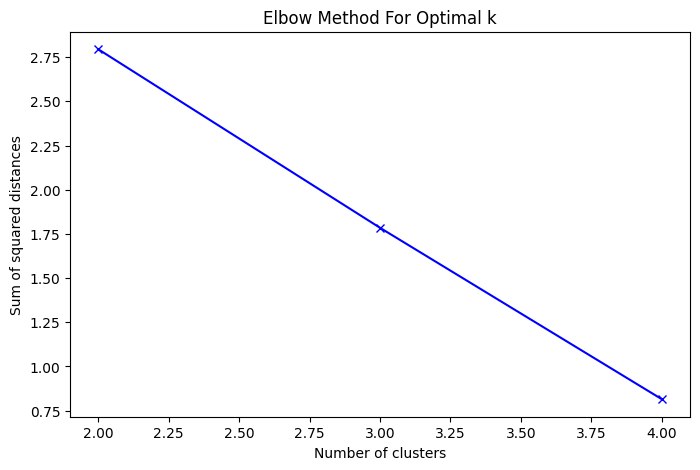

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(2, 5)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(tfidf_matrix)
    sum_of_squared_distances.append(km.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# K-Means using TFIDF vectorized data
num_clusters =3
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

for i, cluster in enumerate(clusters):
    print(f"Sentence {i + 1}: Cluster {cluster}")

Sentence 1: Cluster 2
Sentence 2: Cluster 2
Sentence 3: Cluster 0
Sentence 4: Cluster 1
Sentence 5: Cluster 1


In [ ]:
# Kmeans clustering using Bag of Words
num_clusters =3
km1 = KMeans(n_clusters=num_clusters, random_state=0)
km1.fit(bow_matrix)


KMeans(n_clusters=3, random_state=0)

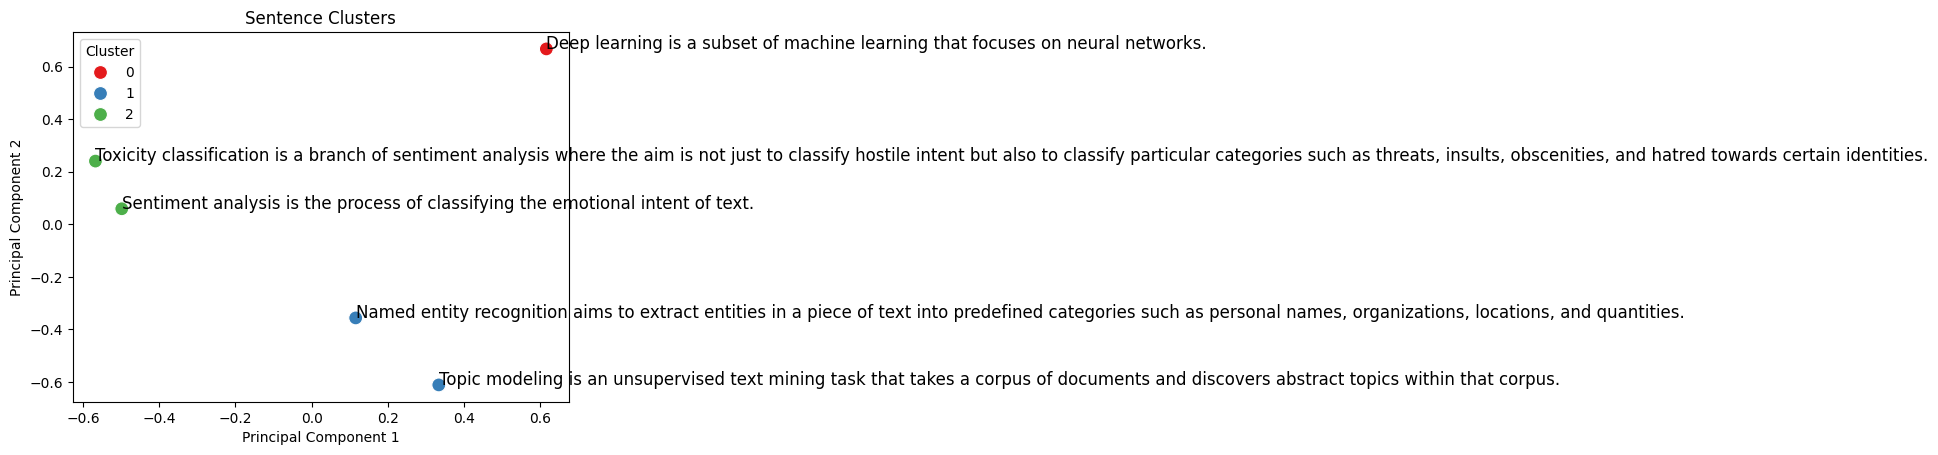

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(tfidf_matrix.toarray())

df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df['Cluster'] = km.labels_
df['Sentence'] = sentences

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
for i in range(len(df)):
    plt.text(df.PC1[i], df.PC2[i], df.Sentence[i], fontsize=12)

plt.title('Sentence Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#  Silhouette Score
# Kmeans clustering using tfidf
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_matrix.toarray(), km.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.031534367020285774


In [ ]:
# kmeans clustering for bag of words
silhouette_avg = silhouette_score(bow_matrix.toarray(), km1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.05762448110328096


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    distances = cdist(X, X, 'euclidean')

    min_intercluster_distance = np.inf
    max_intracluster_distance = -np.inf

    for i in range(num_clusters):
        cluster_points = X[labels == i]

        if len(cluster_points) < 2:
            continue
        intra_dist = np.max(cdist(cluster_points, cluster_points, 'euclidean'))
        max_intracluster_distance = max(max_intracluster_distance, intra_dist)

        for j in range(num_clusters):
            if i == j:
                continue
            cluster_points_other = X[labels == j]
            inter_dist = np.min(cdist(cluster_points, cluster_points_other, 'euclidean'))
            min_intercluster_distance = min(min_intercluster_distance, inter_dist)

    if max_intracluster_distance == 0:
        return np.inf
    return min_intercluster_distance / max_intracluster_distance


# Dunn Index for tfidf clustered data
dunn_idx = dunn_index(tfidf_matrix.toarray(), km.labels_)
print(f'Dunn Index: {dunn_idx}')


Dunn Index: 0.9891086524738786


In [ ]:
# Dunn Index for tfidf clustered data
dunn_idx1 = dunn_index(bow_matrix.toarray(), km1.labels_)
print(f'Dunn Index: {dunn_idx1}')


Dunn Index: 0.916515138991168


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


WORD EMBEDDING

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')
docs = [nlp(sentences) for sentences in sentence]

In [ ]:

print(docs[0].vector)

[ 0.70213425 -0.3311457   0.18117857  0.95537275  3.3274572  -1.3734092
  2.14936     2.9709878  -3.5314429  -1.747573    8.041885    2.9404216
 -4.5848145   1.3469343  -0.68358284  1.5658301   3.6832287   1.2023723
 -2.034414    1.3496791  -2.0784228   0.98196423 -3.1795127   0.22843568
 -2.1140814  -1.9419858  -0.18769002 -0.32415137 -1.8226057   0.2872929
  0.9038144   0.61443996 -1.5281289   0.42392713 -0.70393574 -2.956096
  1.0619214  -1.1471555   2.3676054   1.3172529  -0.20605142 -0.5161554
 -1.6061058   1.2698957  -2.192033    2.0275085   3.0231616  -1.9728373
 -0.85680854 -0.52804285 -1.0617043   1.8859214   0.70713    -3.2440717
 -1.0768058   1.1725757  -0.4149715   1.1267186   2.8604572  -3.4615
  3.6957142   2.0966413  -2.9618144   0.5666042   1.3876629   4.260251
 -1.1433371  -5.701543   -0.5783      2.6223273  -0.18821716  1.60518
 -2.0992029   1.2816714  -2.7105715   1.4962828  -3.2633288   2.5368743
 -2.4548442   0.29805425 -2.6176097  -0.46320862  0.9359256   1.552104

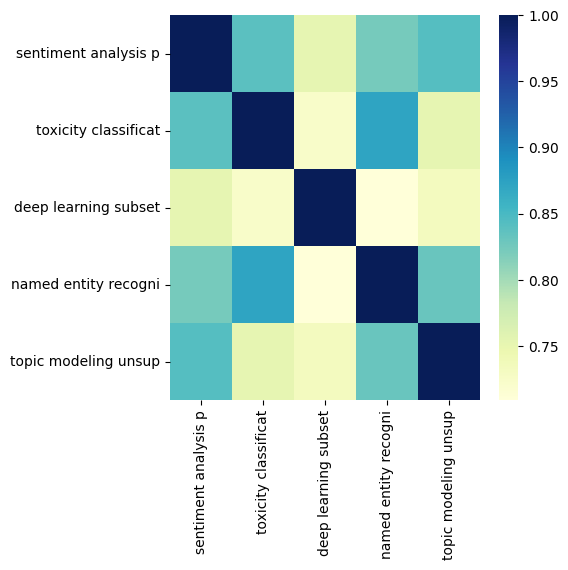

In [ ]:
labels = [headline[:20] for headline in sentence]
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)
similarity = []
for i in range(len(docs)):
    row = []
    for j in range(len(docs)):
      row.append(docs[i].similarity(docs[j]))
    similarity.append(row)
create_heatmap(similarity)